In [24]:
import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import numpy as np
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np
import matplotlib.cm as cm
from scipy import constants
import pandas as pd
from matplotlib import rc
import matplotlib
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams.update({'font.size': 22})
plt.ioff()
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 9 and height to 9
fig_size[1] = 9
fig_size[0] = 9
markersize = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


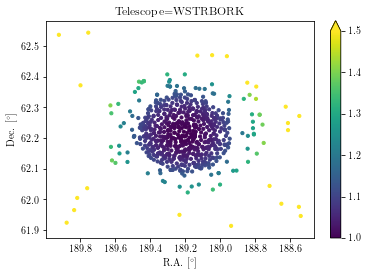

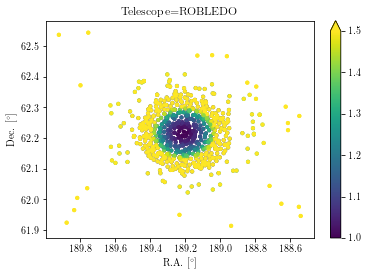

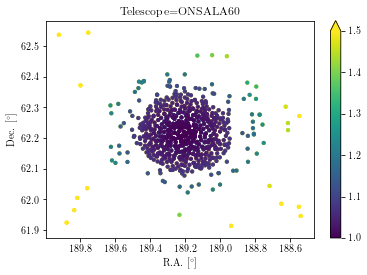

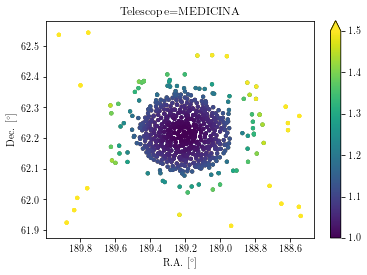

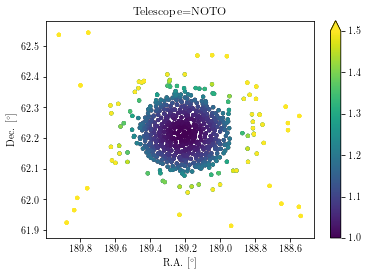

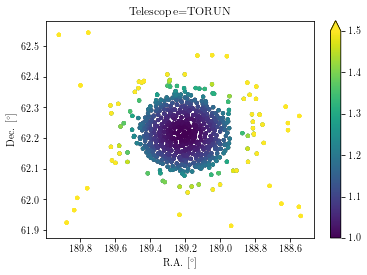

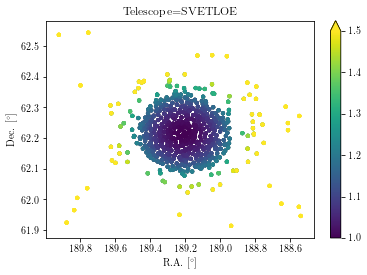

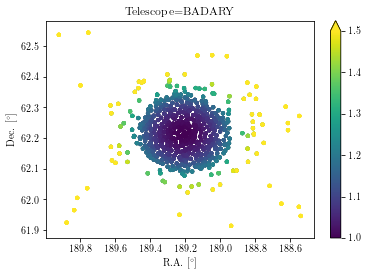

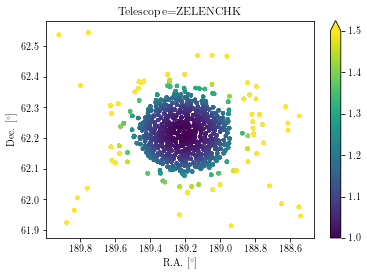

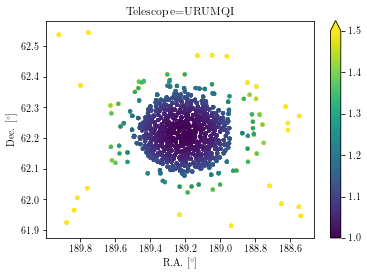

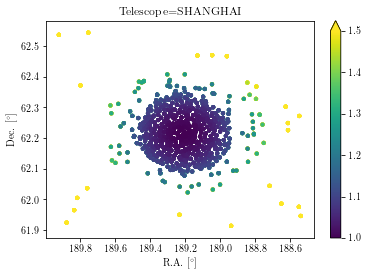

In [2]:
x_central = np.load(open('central_pointing_params.pckl','rb+'))
## Inputs
telescope_index = np.linspace(0,len(x_central[0][3])-1,len(x_central[0][3]))
telescope_name = ['WSTRBORK','ROBLEDO','ONSALA60','MEDICINA','NOTO','TORUN',\
              'SVETLOE','BADARY','ZELENCHK','URUMQI','SHANGHAI']
RA = []
Dec = []
telescope_corr = []
for k in telescope_index:
    k = int(k)
    for i in range(len(x_central)):
        if x_central[i][0].startswith('HDF'):
            if float(x_central[i][1]) > 360:
                    RA = RA + [float(x_central[i][1]) -360]
            else:
                    RA = RA + [float(x_central[i][1])]
            Dec = Dec + [float(x_central[i][2])]
            telescope_corr = telescope_corr + x_central[i][3][int(k)].values()
            if x_central[i][0].startswith('HDFC0153'):
                    HDFC0153central_corr = x_central[i][3]
    fig, ax = plt.subplots()
    plt.gca().invert_xaxis()
    scat = ax.scatter(RA, Dec, c=telescope_corr, s=10,vmin=1,vmax=1.5)
    plt.title(r'Telescope=%s' % (telescope_name[k]))
    plt.colorbar(scat,extend='max')
    plt.xlabel(r'R.A. [$^\circ$]')
    plt.ylabel(r'Dec. [$^\circ$]')
    plt.savefig(r'Telescope_%s' % (telescope_name[k]), bbox_inches='tight')
    plt.show()


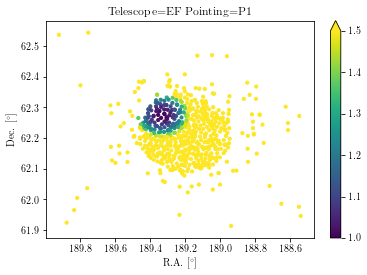

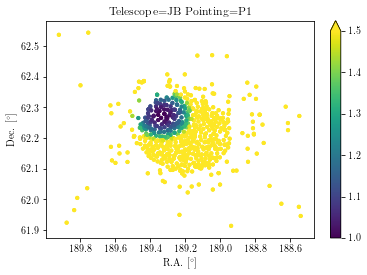

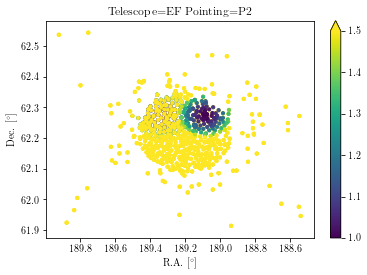

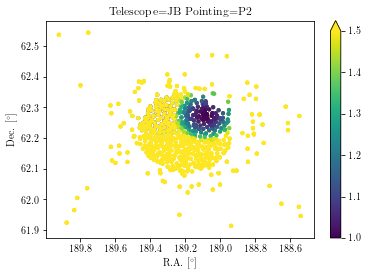

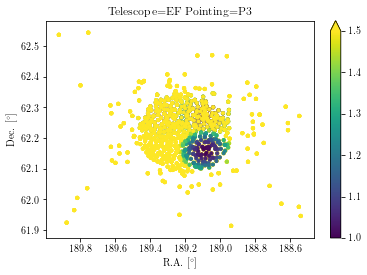

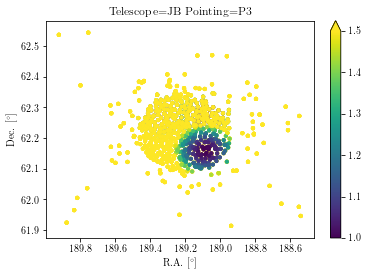

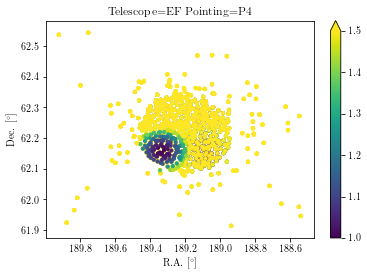

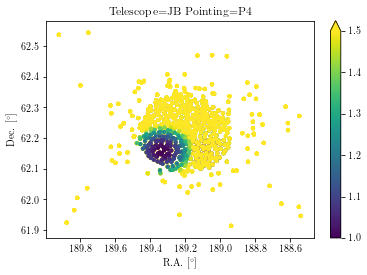

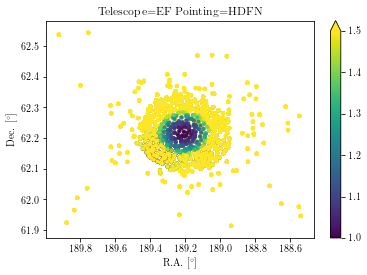

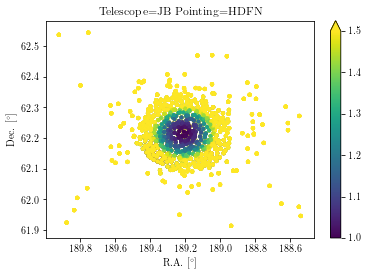

In [3]:
x_outside = np.load(open('outside_pointing_params.pckl','rb+'))
#print x['P1']
## Inputs
Pointing = ['P1','P2','P3','P4','HDFN']
telescope_index = [0,1]
telescope_name = ['EF','JB']


RA = []
Dec = []
telescope_corr = []
HDFC0153outside_corr = []
for j in Pointing:
    x = x_outside[j]
    for k in telescope_index:
        for i in range(len(x)):
            if x[i][0].startswith('HDF'):
                if float(x[i][1]) > 360:
                    RA = RA + [float(x[i][1]) -360]
                else:
                    RA = RA + [float(x[i][1])]
                
                Dec = Dec + [float(x[i][2])]
                telescope_corr = telescope_corr + x[i][3][k].values()
                if x[i][0].startswith('HDFC0153'):
                    HDFC0153outside_corr = HDFC0153outside_corr + [x[i][3]]
        fig, ax = plt.subplots()
        plt.gca().invert_xaxis()
        scat = ax.scatter(RA, Dec, c=telescope_corr, s=10,vmin=1, vmax=1.5)
        plt.title(r'Telescope=%s Pointing=%s' % (telescope_name[k],j))
        plt.colorbar(scat,extend='max')
        plt.xlabel(r'R.A. [$^\circ$]')
        plt.ylabel(r'Dec. [$^\circ$]')
        plt.savefig(r'Telescope_%s_Pointing_%s' % (telescope_name[k],j), bbox_inches='tight')
        plt.show()


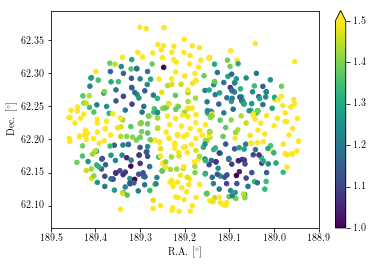

In [4]:
nopbcor = np.load('rms_nopbcor.npy').T
pbcor = np.load('rms_pbcor.npy').T


RA = []
Dec = []
nopbcor_rms = []
pbcor_rms = []
for i in range(len(nopbcor)):
    x = np.where(pbcor==nopbcor[i][0][:8]+'_PBCOR_NA_IM.fits')[0]
    #print np.where(pbcor==nopbcor[i][0][:8]+'_PBCOR_NA_IM.fits')
    if x:
        if nopbcor[i][0][:8] == 'HDFC0153':
            HDFC0153RA = float(pbcor[x[0]][1])
            HDFC0153Dec = float(pbcor[x[0]][2])
        RA = RA + [float(nopbcor[i][1])]
        Dec = Dec + [float(nopbcor[i][2])]
        nopbcor_rms = nopbcor_rms + [float(nopbcor[i][3])]
        pbcor_rms = pbcor_rms + [float(pbcor[x[0]][3])]
    
fig, ax = plt.subplots()
scat = ax.scatter(RA, Dec, c=np.array(pbcor_rms)/np.array(nopbcor_rms), s=20,vmin=1,vmax=1.5)
#HDFC0153_pos = ax.scatter(HDFC0153RA, HDFC0153Dec, s=100)
plt.xlim(188.9,189.5)
plt.gca().invert_xaxis()
plt.colorbar(scat,extend='max')
plt.xlabel(r'R.A. [$^\circ$]')
plt.ylabel(r'Dec. [$^\circ$]')
plt.savefig(r'RMS_diff', bbox_inches='tight')
plt.show()

In [5]:
print HDFC0153central_corr
print HDFC0153outside_corr

[{2: 1.0681605948671373}, {3: 1.6769131554506842}, {4: 1.0431034783627577}, {5: 1.075404375498872}, {6: 1.1140844887743613}, {7: 1.1140844887743613}, {8: 1.1140844887743613}, {9: 1.1140844887743613}, {10: 1.1140844887743613}, {11: 1.0681605948671373}, {12: 1.0606525912633809}]
[[{1: 1.740757108704005}, {13: 1.5053085292180224}], [{1: 1.740757108704005}, {13: 1.5053085292180224}], [{1: 1.2460384126741435}, {13: 1.1762147453588807}], [{1: 1.2460384126741435}, {13: 1.1762147453588807}], [{1: 6.8807059653881684}, {13: 4.149889922309427}], [{1: 6.8807059653881684}, {13: 4.149889922309427}], [{1: 9.6375456224348248}, {13: 5.3211659269166525}], [{1: 9.6375456224348248}, {13: 5.3211659269166525}], [{1: 2.0292358287384289}, {13: 1.6856262671785045}], [{1: 2.0292358287384289}, {13: 1.6856262671785045}]]


In [6]:
from astropy.io import fits
from astropy.coordinates import  Angle, SkyCoord
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata
import scipy.ndimage as ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp2d
from scipy.ndimage.filters import gaussian_filter
from regions import CircleSkyRegion
from astropy.wcs import WCS

In [7]:
RA_all = np.load('rms_pbcor.npy')[1]
Dec_all = np.load('rms_pbcor.npy')[2]
rms_all = np.load('rms_pbcor.npy')[3].astype(float)

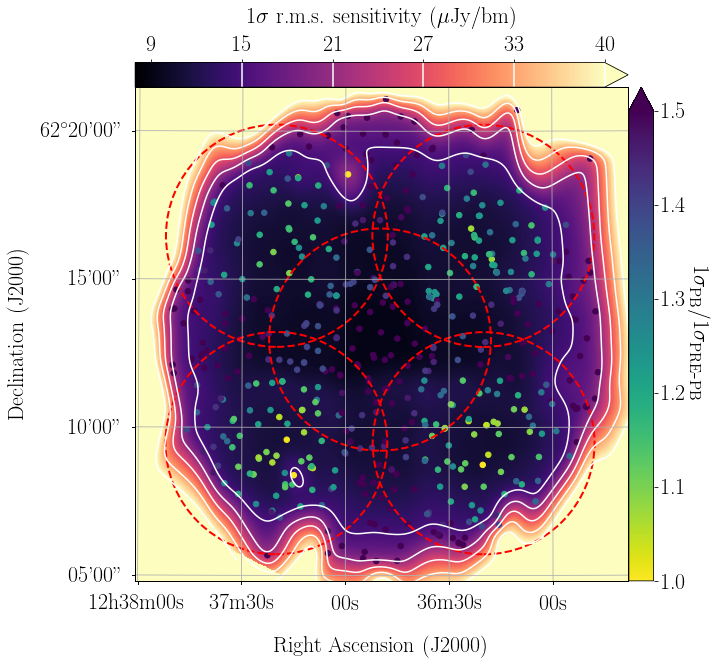

In [25]:
c = SkyCoord(RA_all, Dec_all, unit='deg', frame='icrs')

central_pb = SkyCoord(RA, Dec, unit='deg', frame='icrs')
rms_central = np.array(pbcor_rms)


### Create axes & scatter plot
def grid(x, y, z, resX=1000, resY=1000):
    "Convert 3 column data to matplotlib grid"
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp='linear')
    Z2 = ndimage.gaussian_filter(Z, sigma=1.0, order=1)
    #Z = interp2d(x, y, z, kind='cubic')
    #Z2 = Z(xi,yi)
    X, Y = meshgrid(xi, yi)
    return X, Y, Z


outfilename = 'HDFC0155_NA_PBCOR_IMPy.fits'
hdu = fits.open(outfilename)
wcs = WCS(hdu[0].header)
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
#ax1 = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
lon = ax.coords['ra']
lat = ax.coords['dec']
lon.set_major_formatter('hh:mm:ss')
lat.set_major_formatter('dd:mm:ss')
lon.set_axislabel('Right Ascension (J2000)', minpad=1.5)
lat.set_axislabel('Declination (J2000)', minpad=1)
lim = 500000
shiftx = -50000
shifty = -20000
ax.set_xlim((lim * -1) + shiftx, lim + shiftx)
ax.set_ylim((lim * -1) + shifty, lim + shifty)
#ax1.set_xlim(-500000, 500000)HDFC0155_PBCOR_IM.fits
#ax1.set_ylim(-500000, 500000)
X, Y, Z = grid(c.ra.degree, c.dec.degree, rms_all)
Z_gauss = np.nan_to_num(np.array(gaussian_filter(Z, 12)))
Z_gauss[Z_gauss == 0] = 50
im = ax.pcolormesh(
    X,
    Y,
    Z_gauss,
    transform=ax.get_transform('icrs'),
    cmap='magma',
    vmin=8.5,
    vmax=40)
CS = ax.contour(
    X,
    Y,
    gaussian_filter(Z, 10),
    levels=np.linspace(np.amin(rms_all), 40, 6),
    colors='w',
    transform=ax.get_transform('icrs'),
    interpolation='none')
divider = make_axes_locatable(ax)
cax = divider.append_axes(
    "top", size="5%", pad=0.00, axes_class=matplotlib.axes.Axes)
cb = plt.colorbar(
    orientation="horizontal",
    mappable=im,
    cax=cax,
    format='%d',
    ticks=np.linspace(np.amin(rms_all), 40, 6),
    extend='max')
cb.add_lines(CS)
cb.ax.xaxis.set_ticks_position('top')
cax.set_xlabel("1$\sigma$ r.m.s. sensitivity ($\mu$Jy/bm)", labelpad=-80)


##### Scatter portion ####
scat = ax.scatter(
    central_pb.ra.degree,
    central_pb.dec.degree,
    transform=ax.get_transform('icrs'),
    marker='o',
    c=np.array(pbcor_rms) / np.array(nopbcor_rms),s=30,vmin=1,vmax=1.5,
    alpha=1,cmap='viridis_r')
cax2 = divider.append_axes(
    "right", size="5%", pad=0.01, axes_class=matplotlib.axes.Axes)
cb2 = plt.colorbar(
    orientation="vertical",
    mappable=scat,
    cax=cax2,
    format='%.1f',
    extend='max')
cax2.set_ylabel(r"$1\sigma_{\rm PB}/1\sigma_{\rm PRE\mbox{-}PB}$",rotation=270, labelpad=22)

### Regions of EF primary beams
region1 = CircleSkyRegion(
    SkyCoord('12h36m50.0s', '+62d12m58.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region1 = region1.to_pixel(wcs)
region2 = CircleSkyRegion(
    SkyCoord('12h37m20.0s', '+62d16m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region2 = region2.to_pixel(wcs)
region3 = CircleSkyRegion(
    SkyCoord('12h36m20.0s', '+62d16m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region3 = region3.to_pixel(wcs)
region4 = CircleSkyRegion(
    SkyCoord('12h36m20.0s', '+62d09m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region4 = region4.to_pixel(wcs)
region5 = CircleSkyRegion(
    SkyCoord('12h37m20.0s', '+62d09m28.00s', frame='icrs'), Angle(
        0.0625, 'deg'))
pixel_region5 = region5.to_pixel(wcs)
linewidths = 2
pixel_region1.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region2.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region3.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region4.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
pixel_region5.plot(ax, facecolor='none', edgecolor='red', linestyle='--',linewidth=linewidths)
#print np.amin(rms), np.amax(rms)
fig.savefig('rms_pbcor_plot.png', bbox_inches='tight', dpi=fig.dpi, format="png")

In [9]:
np.save('rms_differences_natural_weighting.npy',[central_pb.ra.degree,central_pb.dec.degree,np.array(pbcor_rms) / np.array(nopbcor_rms)])

# Errors 

In [10]:
from VLBI_analysis_functions import *
from astropy import units as u

In [11]:
rms = pd.DataFrame({'RA_rms':central_pb.ra.degree,'Dec_rms':central_pb.dec.degree,'pbcor_rat':(np.array(pbcor_rms) / np.array(nopbcor_rms))})

In [12]:
VLBI = pd.read_csv('/Users/jackradcliffe/PhD/GOODSN_Catalogues/eg078_EVN_catalogues/eg078b/VLBI_Catalogue_fix_v13.csv')

['Catalog_name' 'rms_natural_weight' 'BMAJ_natural_weight'
 'BMIN_natural_weight' 'BPA_natural_weight' 'ID_natural_weight'
 'npix_natural_weight' 'x_p_natural_weight' 'y_p_natural_weight'
 'RA_p_natural_weight' 'Dec_p_natural_weight' 'RA_err_natural_weight'
 'Dec_err_natural_weight' 'x_c_natural_weight' 'y_c_natural_weight'
 'RA_c_natural_weight' 'Dec_c_natural_weight' 'cFlag_natural_weight'
 'x_wc_natural_weight' 'y_wc_natural_weight' 'RA_wc_natural_weight'
 'Dec_wc_natural_weight' 'wcFlag_natural_weight' 'xmin_natural_weight'
 'xmax_natural_weight' 'ymin_natural_weight' 'ymax_natural_weight'
 'rms_natural_weight.1' 'BWScorr_natural_weight' 'M_natural_weight'
 'SNR_OBS_natural_weight' 'SNR_FIT_natural_weight' 'SNR_natural_weight'
 'S_p_OBS_natural_weight' 'S_p_FIT_natural_weight' 'S_p_natural_weight'
 'S_p_CB_natural_weight' 'S_p_CBBWS_natural_weight'
 'S_p_CBBWS_err_natural_weight' 'S_int_OBS_natural_weight'
 'S_int_OBSCB_natural_weight' 'S_int_natural_weight'
 'S_int_CB_natural_weig

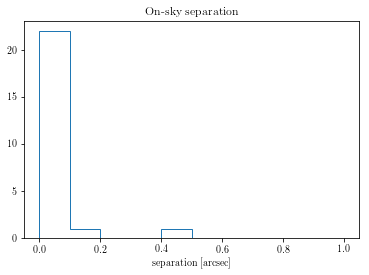

In [13]:
df = match_catalogues(
    cat1=rms,
    cat2=VLBI,
    name1='rms',
    name2='VLBI',
    RA1='RA_rms',
    Dec1='Dec_rms',
    unit1=('deg', 'deg'),
    RA2='RA_c_natural_weight',
    Dec2='Dec_c_natural_weight',
    unit2=('deg', 'deg'),
    keep_cat1=True,
    keep_cat2=True,
    columns1=rms.columns.values,
    columns2=VLBI.columns.values,
    distance=1 * u.arcsecond)

In [14]:
df = df[df.Catalog_name.notnull()==False]

In [15]:
du = pd.concat([df.Dec_rms,df.RA_rms,df.pbcor_rat,df.Catalog_name],axis=1)

In [16]:
dx = nearest_match_to(VLBI,du,RA1='RA_c_natural_weight',
    DEC1='Dec_c_natural_weight',unit1=('deg','deg'),RA2='RA_rms',DEC2='Dec_rms',unit2=('deg','deg'),distance=50*u.arcsecond)

In [17]:
dx = dx[dx['Catalog_name_1_1'].astype(str).str.startswith('HDFC')]

In [18]:
dx

,Dec_rms,RA_rms,pbcor_rat,Catalog_name,Catalog_name,rms_natural_weight,BMAJ_natural_weight,BMIN_natural_weight,BPA_natural_weight,ID_natural_weight,...,S_int_CB_err_JVLA_central,R_EST_JVLA_central,VisArea_JVLA_central,VLBI_P_nat_PB_err,VLBI_I_nat_PB_err,VLBI_P_uni_PB_err,VLBI_I_uni_PB_err,Separation,DeltaRA,DeltaDec
0,62.158333,188.971000,1.503968,NaN,HDFC0015,0.000015,0.000005,0.000004,84.22,1,...,0.000019,1.28,-1.0,0.000029,0.000030,NaN,NaN,31.819214,-14.615604,28.263872
1,62.167639,189.023875,1.308481,NaN,HDFC0033,0.000013,0.000005,0.000005,84.07,1,...,0.000021,1.44,-1.0,0.000023,0.000025,NaN,NaN,13.799638,-6.176064,12.340431
2,62.172611,189.028542,1.334047,NaN,HDFC0037,0.000013,0.000005,0.000004,84.27,1,...,0.000024,1.31,-1.0,0.000029,0.000031,NaN,NaN,17.012934,-8.888126,-14.506589
3,62.264333,189.072667,1.303624,NaN,HDFC0068,0.000011,0.000004,0.000004,-4.92,1,...,0.000028,1.96,-1.0,0.000043,0.000048,0.000040,0.000044,10.863476,-0.799731,10.833999
4,62.151306,189.077708,1.049064,NaN,HDFC0075,0.000013,0.000005,0.000005,84.07,1,...,0.000016,1.22,-1.0,0.000041,0.000046,0.000043,0.000038,23.347156,-11.295067,20.433089
5,62.285761,189.087792,1.202151,NaN,HDFC0084,0.000011,0.000004,0.000004,-5.69,1,...,0.000019,1.84,-1.0,0.000026,0.000033,NaN,NaN,1.413370,-1.384973,0.281893
6,62.113556,189.100875,1.386244,NaN,HDFC0085,0.000014,0.000005,0.000004,84.48,1,...,0.000025,1.23,-1.0,0.000032,0.000038,NaN,NaN,12.957736,11.935578,-5.044295
7,62.274889,189.094417,1.180809,NaN,HDFC0095,0.000011,0.000004,0.000004,-5.41,1,...,0.000041,1.12,-1.0,0.000069,0.000072,0.000048,0.000083,14.521802,-6.168447,-13.146596
8,62.300000,189.177083,1.533088,NaN,HDFC0153,0.000015,0.000004,0.000004,0.05,1,...,0.000030,0.99,-1.0,0.000035,0.000042,0.000037,0.000041,35.722626,13.485569,-33.079380
9,62.216667,189.187500,1.670712,NaN,HDFC0155,0.000010,0.000004,0.000004,78.73,1,...,0.000048,1.21,-1.0,0.000039,0.000056,0.000024,0.000051,37.438014,20.347551,-31.425819


In [19]:
def error_propagation(dataframe, flux_col, flux_err_col, pbcor_val_col,
                      percentage_to_add, limit_ratio):
    limit = limit_ratio - 1
    percentage_fraction = percentage_to_add / 100.
    return (dataframe[flux_err_col] / 2.) + (
        (dataframe[pbcor_val_col] - 1
         ) / limit) * percentage_fraction * dx[flux_col]


x = pd.DataFrame([])
y = [
    'S_p_natural_weight', 'S_int_natural_weight', 'S_p_uniform_weight',
    'S_int_uniform_weight'
]
y_err = [
    'S_p_CBBWS_err_natural_weight', 'S_int_CB_err_natural_weight',
    'S_p_CBBWS_err_uniform_weight', 'S_int_CB_err_uniform_weight'
]
for i in range(len(y)):
    dx = pd.concat([dx,pd.DataFrame({y[i]+'_err_mod':error_propagation(
            dataframe=dx,
            flux_col=y[i],
            flux_err_col=y_err[i],
            pbcor_val_col='pbcor_rat',
            percentage_to_add=20.,
            limit_ratio=1.75)})],axis=1)

In [20]:
pd.concat([dx.Catalog_name_1_1,
    dx['S_p_natural_weight_err_mod'], dx['S_int_natural_weight_err_mod'], dx['S_p_uniform_weight_err_mod'],
    dx['S_int_uniform_weight_err_mod']
], axis=1).to_csv('eg078b_PB_errors.csv')

In [21]:
((dx.pbcor_rat - 1) / 0.75)

0     0.671957
1     0.411308
2     0.445395
3     0.404832
4     0.065418
5     0.269535
6     0.514992
7     0.241079
8     0.710784
9     0.894283
10    0.862549
11    0.984473
12    0.863472
13    0.524809
14    0.511533
15    0.557731
16    0.130606
17    0.265878
18    0.345395
19    0.264164
20    0.293877
21    0.168059
22    0.196111
23    0.465450
Name: pbcor_rat, dtype: float64

In [22]:
dx.S_int_CB_err_natural_weight

0     0.000029
1     0.000024
2     0.000031
3     0.000047
4     0.000044
5     0.000032
6     0.000037
7     0.000070
8     0.000041
9     0.000056
10    0.000078
11    0.000047
12    0.000026
13    0.000026
14    0.000900
15    0.000044
16    0.000034
17    0.000139
18    0.000573
19    0.000036
20    0.000053
21    0.000028
22    0.000090
23    0.000031
Name: S_int_CB_err_natural_weight, dtype: float64